Data Wrangling

In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import math

In [2]:
carros=pd.read_csv('Dataset - Venda de Carros .csv', encoding='latin1', sep=';', decimal=',')

In [3]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nome_Carro      301 non-null    object 
 1   Ano_Fabricação  301 non-null    int64  
 2   Preço_Venda     299 non-null    float64
 3   Preço_Atual     297 non-null    float64
 4   Km_Rodados      297 non-null    float64
 5   Tipo_Motor      300 non-null    object 
 6   Tipo_Vendedor   301 non-null    object 
 7   Transmissão     301 non-null    object 
 8   Donos           301 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [4]:
carros.head()

,Nome_Carro,Ano_Fabricação,Preço_Venda,Preço_Atual,Km_Rodados,Tipo_Motor,Tipo_Vendedor,Transmissão,Donos
0,ritz,2014,3.35,5.59,27000.0,Gasolina,Intermediária,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Intermediária,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Gasolina,Intermediária,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Gasolina,Intermediária,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Intermediária,Manual,0


Duplicidades

In [5]:
carros.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [11]:
carros.duplicated().value_counts()

False    299
True       2
Name: count, dtype: int64

In [15]:
carros[carros.duplicated()]

,Nome_Carro,Ano_Fabricação,Preço_Venda,Preço_Atual,Km_Rodados,Tipo_Motor,Tipo_Vendedor,Transmissão,Donos
17,ertiga,2016,7.75,10.79,43000.0,Diesel,Intermediária,Manual,0
93,fortuner,2015,23.00,30.61,40000.0,Diesel,Intermediária,Automática,0


In [14]:
carros[carros.duplicated(keep='last')]

,Nome_Carro,Ano_Fabricação,Preço_Venda,Preço_Atual,Km_Rodados,Tipo_Motor,Tipo_Vendedor,Transmissão,Donos
15,ertiga,2016,7.75,10.79,43000.0,Diesel,Intermediária,Manual,0
51,fortuner,2015,23.00,30.61,40000.0,Diesel,Intermediária,Automática,0


In [16]:
carros[carros.duplicated(keep=False)]

,Nome_Carro,Ano_Fabricação,Preço_Venda,Preço_Atual,Km_Rodados,Tipo_Motor,Tipo_Vendedor,Transmissão,Donos
15,ertiga,2016,7.75,10.79,43000.0,Diesel,Intermediária,Manual,0
17,ertiga,2016,7.75,10.79,43000.0,Diesel,Intermediária,Manual,0
51,fortuner,2015,23.00,30.61,40000.0,Diesel,Intermediária,Automática,0
93,fortuner,2015,23.00,30.61,40000.0,Diesel,Intermediária,Automática,0


In [17]:
carros.drop_duplicates(subset=['Nome_Carro','Ano_Fabricação']).sort_values(['Nome_Carro','Ano_Fabricação'])

,Nome_Carro,Ano_Fabricação,Preço_Venda,Preço_Atual,Km_Rodados,Tipo_Motor,Tipo_Vendedor,Transmissão,Donos
196,Activa 3g,2008,0.17,0.52,500000.0,Gasolina,Direta,Automática,0
165,Activa 3g,2016,0.45,0.54,500.0,Gasolina,Direta,Automática,0
173,Activa 4g,2017,0.40,0.51,1300.0,Gasolina,Direta,Automática,0
195,Bajaj ct 100,2015,0.18,0.32,35000.0,Gasolina,Direta,Manual,0
127,Bajaj Avenger 150,2016,0.75,0.80,7000.0,Gasolina,Direta,Manual,0
...,...,...,...,...,...,...,...,...,...
24,wagon r,2013,2.90,4.41,56879.0,Gasolina,Intermediária,Manual,0
18,wagon r,2015,3.25,5.09,35500.0,GNV,Intermediária,Manual,0
242,xcent,2014,4.40,7.13,34000.0,Gasolina,Intermediária,Manual,0
241,xcent,2015,4.75,7.13,35866.0,Gasolina,Intermediária,Manual,1


Datas

In [18]:
casas=pd.read_csv("Dataset - Casas.csv",encoding='latin1', sep=';')
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10000 non-null  int64  
 1   date       10000 non-null  object 
 2   price      10000 non-null  object 
 3   bedrooms   10000 non-null  int64  
 4   bathrooms  10000 non-null  float64
 5   floors     10000 non-null  float64
 6   yr_built   10000 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 547.0+ KB


In [23]:
casas.head()

,id,date,price,bedrooms,bathrooms,floors,yr_built
0,7129300520,20141013T000000,221900,3,1.00,1.0,1955
1,6414100192,20141209T000000,538000,3,2.25,2.0,1951
2,5631500400,20150225T000000,180000,2,1.00,1.0,1933
3,2487200875,20141209T000000,604000,4,3.00,1.0,1965
4,1954400510,20150218T000000,510000,3,2.00,1.0,1987


In [ ]:
casas.date.str.split('T').str[0]

0       20141013
1       20141209
2       20150225
3       20141209
4       20150218
          ...   
9995    20140926
9996    20150209
9997    20140807
9998    20150402
9999    20140609
Name: date, Length: 10000, dtype: object

In [24]:
casas['data_coleta']=pd.to_datetime(casas.date.str.split('T').str[0],format='%Y%m%d')
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           10000 non-null  int64         
 1   date         10000 non-null  object        
 2   price        10000 non-null  object        
 3   bedrooms     10000 non-null  int64         
 4   bathrooms    10000 non-null  float64       
 5   floors       10000 non-null  float64       
 6   yr_built     10000 non-null  int64         
 7   data_coleta  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 625.1+ KB


In [25]:
casas.tail()

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta
9995,322059264,20140926T000000,279000,2,1.00,1.0,1904,2014-09-26
9996,5557500270,20150209T000000,262000,3,1.50,1.0,1962,2015-02-09
9997,9164100125,20140807T000000,533000,4,1.00,1.5,1919,2014-08-07
9998,7370600045,20150402T000000,640000,3,1.75,1.0,1950,2015-04-02
9999,8594400060,20140609T000000,285000,3,2.25,2.0,1987,2014-06-09


In [26]:
casas['data_formatada']=casas.data_coleta.dt.strftime('%d/%m/%Y')
casas

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada
0,7129300520,20141013T000000,221900,3,1.00,1.0,1955,2014-10-13,13/10/2014
1,6414100192,20141209T000000,538000,3,2.25,2.0,1951,2014-12-09,09/12/2014
2,5631500400,20150225T000000,180000,2,1.00,1.0,1933,2015-02-25,25/02/2015
3,2487200875,20141209T000000,604000,4,3.00,1.0,1965,2014-12-09,09/12/2014
4,1954400510,20150218T000000,510000,3,2.00,1.0,1987,2015-02-18,18/02/2015
...,...,...,...,...,...,...,...,...,...
9995,322059264,20140926T000000,279000,2,1.00,1.0,1904,2014-09-26,26/09/2014
9996,5557500270,20150209T000000,262000,3,1.50,1.0,1962,2015-02-09,09/02/2015
9997,9164100125,20140807T000000,533000,4,1.00,1.5,1919,2014-08-07,07/08/2014
9998,7370600045,20150402T000000,640000,3,1.75,1.0,1950,2015-04-02,02/04/2015


Ordenação

In [27]:
casas=casas.sort_values('yr_built').reset_index(drop=True)
casas

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada
0,1175000570,20150312T000000,530000,5,2.00,1.5,1900,2015-03-12,12/03/2015
1,8005100360,20140916T000000,169900,3,1.00,1.5,1900,2014-09-16,16/09/2014
2,6300000337,20140529T000000,550000,5,2.00,1.0,1900,2014-05-29,29/05/2014
3,3626039325,20141121T000000,740500,3,3.50,2.0,1900,2014-11-21,21/11/2014
4,917000300,20140520T000000,452000,4,1.00,1.5,1900,2014-05-20,20/05/2014
...,...,...,...,...,...,...,...,...,...
9995,9520900210,20141231T000000,614285,5,2.75,2.0,2015,2014-12-31,31/12/2014
9996,8077100031,20150422T000000,631000,3,2.25,2.0,2015,2015-04-22,22/04/2015
9997,1832100030,20140625T000000,597326,4,4.00,2.0,2015,2014-06-25,25/06/2014
9998,558100090,20150312T000000,628000,5,2.75,2.0,2015,2015-03-12,12/03/2015


In [35]:
casas.price.value_counts()

price
350000      92
450000      82
550000      74
425000      73
250000      69
            ..
819900       1
839900       1
357562       1
580135       1
3.42E+10     1
Name: count, Length: 2402, dtype: int64

In [28]:
casas.price.astype(float)

ValueError: could not convert string to float: '1,30E+09'

In [31]:
casas[casas.price.str.upper().str.contains('E+')].price.value_counts()

price
1.15e+006    16
1.05e+006    16
1,00E+06     15
1.25e+006    15
1.1e+006     15
             ..
5.35e+006     1
1,23E+11      1
1.61e+006     1
3,42E+10      1
1,04E+11      1
Name: count, Length: 264, dtype: int64

In [32]:
casas.price=casas.price.str.upper()
casas.price=casas.price.str.replace(',','.')

In [46]:
casas['preco']=np.where(casas.price.str.contains('E+'), casas.price.str.split('E+').str[0].astype(float)*casas.price.str.split('E+').str[1].astype(float),casas.price)
casas['preco'].value_counts(dropna=False)

preco
350000    92
450000    82
550000    74
425000    73
250000    69
          ..
699800     1
303700     1
448500     1
518500     1
659950     1
Name: count, Length: 2386, dtype: int64

In [53]:
casas.yr_built=casas.yr_built.astype(str)
casas.preco=casas.preco.astype(float)

casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10000 non-null  int64         
 1   date            10000 non-null  object        
 2   price           10000 non-null  object        
 3   bedrooms        10000 non-null  int64         
 4   bathrooms       10000 non-null  float64       
 5   floors          10000 non-null  float64       
 6   yr_built        10000 non-null  object        
 7   data_coleta     10000 non-null  datetime64[ns]
 8   data_formatada  10000 non-null  object        
 9   preco           10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 781.4+ KB


Group by

In [54]:
preco_medio=casas.groupby('yr_built')[['preco']].mean().round(0).astype(int)
preco_medio

,preco
yr_built,
1900,465810
1901,474711
1902,466448
1903,465892
1904,500113
...,...
2011,443600
2012,468900
2013,445690


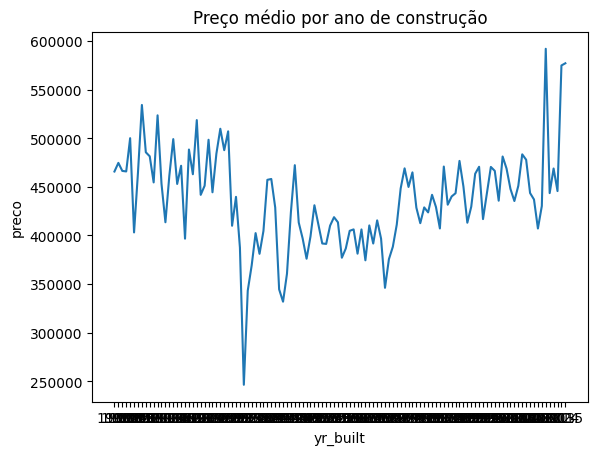

In [57]:
line=sns.lineplot(x=preco_medio.index,y=preco_medio.preco).set_title('Preço médio por ano de construção')
# 

Amostragem

In [58]:
# amostra de 10%
amostra_casas_simples=casas.sample(n=len(casas)//10, random_state=25)
amostra_casas_simples

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada,preco
3555,514500235,20141020T000000,411100,3,1.50,1.0,1958,2014-10-20,20/10/2014,411100.0
4078,7618700112,20150210T000000,634000,3,1.75,2.0,1962,2015-02-10,10/02/2015,634000.0
8445,8651611130,20140605T000000,798000,3,3.50,2.0,1999,2014-06-05,05/06/2014,798000.0
5939,8732131090,20150428T000000,295000,4,2.50,1.0,1978,2015-04-28,28/04/2015,295000.0
5583,1313500070,20140820T000000,249000,3,1.50,1.0,1976,2014-08-20,20/08/2014,249000.0
...,...,...,...,...,...,...,...,...,...,...
4367,7524000030,20140630T000000,250000,3,2.00,1.0,1965,2014-06-30,30/06/2014,250000.0
8622,6865200444,20140505T000000,531000,2,3.00,2.0,2000,2014-05-05,05/05/2014,531000.0
67,7228501580,20150116T000000,415000,3,1.00,1.5,1903,2015-01-16,16/01/2015,415000.0
1724,2426039130,20140610T000000,417500,4,1.00,1.5,1941,2014-06-10,10/06/2014,417500.0


In [59]:
# amostra de 10% para cada ano de construção
anos=casas.yr_built.unique()
amostra_casas_extratificada=pd.DataFrame()
for i in anos:
    aux=casas[casas.yr_built==i].copy()
    amostra=aux.sample(n=math.ceil(len(aux)*0.1),random_state=25)
    amostra_casas_extratificada=pd.concat([amostra_casas_extratificada,amostra])

amostra_casas_extratificada

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada,preco
19,7011200260,20141219T000000,485000,4,2.00,1.0,1900,2014-12-19,19/12/2014,485000.0
33,3364900156,20150317T000000,382888,1,1.00,1.0,1900,2015-03-17,17/03/2015,382888.0
6,9829200590,20141028T000000,759000,3,2.75,1.5,1900,2014-10-28,28/10/2014,759000.0
11,1931300665,20141009T000000,850000,3,3.00,1.5,1900,2014-10-09,09/10/2014,850000.0
47,1250201130,20150206T000000,410000,4,2.00,1.0,1901,2015-02-06,06/02/2015,410000.0
...,...,...,...,...,...,...,...,...,...,...
9934,1025049114,20140717T000000,625504,3,2.25,2.0,2014,2014-07-17,17/07/2014,625504.0
9974,8929000380,20140805T000000,479990,3,2.50,2.0,2014,2014-08-05,05/08/2014,479990.0
9965,8113600004,20140520T000000,599950,3,2.50,2.0,2014,2014-05-20,20/05/2014,599950.0
9941,7308600050,20140909T000000,738515,5,2.75,2.0,2014,2014-09-09,09/09/2014,738515.0


In [60]:
# amostra de 10% para comglomerados de 10%(1000)
amostra_casas_conglomerados=pd.DataFrame()
n_conglomerado=len(casas)//10
aux=casas.copy()
while True:
    conglomerado=aux.sample(n=n_conglomerado, random_state=25)
    amostra_casas_conglomerados=pd.concat([amostra_casas_conglomerados, conglomerado.sample(frac=0.1, random_state=25)])
    aux.drop(conglomerado.index, axis=0, inplace=True)
    if len(aux)==0:
        break

amostra_casas_conglomerados

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada,preco
3800,7633400110,20150224T000000,270500,3,1.50,1.0,1960,2015-02-24,24/02/2015,270500.00
6515,6137500310,20150213T000000,1.32E+09,5,4.00,2.0,1982,2015-02-13,13/02/2015,11.88
6098,9264900660,20140919T000000,241500,4,2.50,1.0,1979,2014-09-19,19/09/2014,241500.00
597,2767601815,20150317T000000,356000,3,1.00,1.0,1916,2015-03-17,17/03/2015,356000.00
8219,7436300160,20140625T000000,409900,2,2.50,2.0,1997,2014-06-25,25/06/2014,409900.00
...,...,...,...,...,...,...,...,...,...,...
7989,2303900090,20140729T000000,2.88E+10,4,2.50,2.0,1994,2014-07-29,29/07/2014,28.80
1359,1324079041,20141118T000000,275000,3,1.00,1.0,1930,2014-11-18,18/11/2014,275000.00
8899,2024059110,20150420T000000,925000,3,3.25,2.0,2002,2015-04-20,20/04/2015,925000.00
7566,8941800100,20150427T000000,645000,3,3.25,2.0,1991,2015-04-27,27/04/2015,645000.00


In [ ]:
# amostra sem reposição
amostra_casas_reposicao=casas.sample(n=20000, random_state=25)
amostra_casas_reposicao

ValueError: Cannot take a larger sample than population when 'replace=False'

In [62]:
# amostra com reposição
amostra_casas_reposicao=casas.sample(n=20000, random_state=25, replace=True)
amostra_casas_reposicao

,id,date,price,bedrooms,bathrooms,floors,yr_built,data_coleta,data_formatada,preco
8510,5652601455,20140623T000000,775000,4,2.50,2.0,1999,2014-06-23,23/06/2014,775000.0
6618,5727500019,20140605T000000,395000,4,3.00,1.0,1983,2014-06-05,05/06/2014,395000.0
2934,7011201550,20140707T000000,780000,4,2.00,1.0,1953,2014-07-07,07/07/2014,780000.0
8447,3224600310,20141030T000000,685100,4,2.50,2.0,1999,2014-10-30,30/10/2014,685100.0
1175,7384500110,20140723T000000,685000,3,2.50,3.0,1927,2014-07-23,23/07/2014,685000.0
...,...,...,...,...,...,...,...,...,...,...
6977,6743700015,20150128T000000,392800,3,2.00,1.0,1986,2015-01-28,28/01/2015,392800.0
2971,8924100111,20150424T000000,699000,2,1.50,1.0,1954,2015-04-24,24/04/2015,699000.0
1905,2113701200,20140912T000000,250000,2,1.00,1.0,1943,2014-09-12,12/09/2014,250000.0
6822,3459800020,20150406T000000,560000,4,1.75,1.0,1985,2015-04-06,06/04/2015,560000.0


In [63]:

amostra_casas_reposicao.index.value_counts()

7532    10
2808    10
8780    10
9080     9
8411     8
        ..
5634     1
2180     1
1369     1
6931     1
479      1
Name: count, Length: 8614, dtype: int64